In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
from tqdm import tqdm

%matplotlib inline

2024-04-28 12:28:44.477786: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-28 12:28:44.820947: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-28 12:28:45.514004: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Audio Classification Data Preprocessing

In [2]:
audio_file_path = '../data/raw/belly_pain/549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav'
librosa_audio_data, librosa_sr = librosa.load(audio_file_path)

### Plot the librosa audio Data
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

## Feature Extract
- Using Mel-Frequency Cepstral Coefficient

In [3]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sr, n_mfcc=40)
print(mfccs.shape)

(40, 296)


In [4]:
mfccs

array([[-677.43274  , -677.43274  , -677.43274  , ..., -444.98138  ,
        -449.41757  , -426.4009   ],
       [   0.       ,    0.       ,    0.       , ...,  170.87239  ,
         165.91772  ,  175.7207   ],
       [   0.       ,    0.       ,    0.       , ...,  -33.7181   ,
         -40.28018  ,  -47.720734 ],
       ...,
       [   0.       ,    0.       ,    0.       , ...,    2.9362614,
          -2.598775 ,   -3.068015 ],
       [   0.       ,    0.       ,    0.       , ...,    5.134433 ,
           5.434246 ,   -2.0220554],
       [   0.       ,    0.       ,    0.       , ...,    4.379753 ,
          15.118777 ,    3.3074508]], dtype=float32)

In [2]:
#### Extracting MFCC's for every audio file

audio_dataset_path = '/home/kotaro/Documents/Baby Cry Analysis/data/raw'
metadata = pd.read_csv('/home/kotaro/Documents/Baby Cry Analysis/data/metadata/donateacry-corpus_features_final.csv')
metadata.head()

,Cry_Audio_File,Cry_Reason,Class,Folder
0,/home/kotaro/Documents/Baby Cry Analysis/data/...,0,belly_pain,belly_pain
1,/home/kotaro/Documents/Baby Cry Analysis/data/...,0,belly_pain,belly_pain
2,/home/kotaro/Documents/Baby Cry Analysis/data/...,0,belly_pain,belly_pain
3,/home/kotaro/Documents/Baby Cry Analysis/data/...,0,belly_pain,belly_pain
4,/home/kotaro/Documents/Baby Cry Analysis/data/...,0,belly_pain,belly_pain


## Optional 
- Try to augment the audio for a better quality after it passing to mfcc

In [6]:
### Code for augmententation

In [3]:
### Extracting
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0) # Transpose

    return mfccs_scaled_features

In [ ]:
### Iterate through every file

extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'Folder'+str(row["Folder"])+'/',str(row["Cry_Audio_File"]))
    final_class_labels = row["Class"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

[[array([-4.2839420e+02,  1.4889998e+02, -6.9306190e+01, -1.5013275e+01,
          2.8952463e+01, -3.8647449e+01, -2.5540077e+01,  2.0923857e+01,
          1.0842575e-01, -1.1324343e+01,  6.5159684e-01, -5.3665795e+00,
         -5.4911342e+00, -3.3067541e+00, -1.1671538e+01, -5.8877859e+00,
          3.2825727e+00,  2.4690984e-01,  3.2616770e+00,  6.6030979e+00,
          1.4022417e-01, -2.3688872e+00, -2.4789262e+00, -4.1906090e+00,
         -7.9785258e-01, -2.0990503e-01, -4.3270335e+00, -2.6921654e+00,
         -6.5834910e-01, -2.4887719e+00, -1.7470660e+00, -1.5832616e+00,
         -3.5615823e+00, -2.2580533e+00, -5.4840362e-01, -8.5921103e-01,
         -2.9156730e-01,  2.1960019e-01,  4.4626310e-01,  5.2334195e-01],
        dtype=float32),
  'belly_pain'],
 [array([-4.1736902e+02,  1.9504312e+02, -9.3951714e+01, -6.4751282e+00,
          2.6089195e+01, -4.8660007e+01, -2.4352131e+00,  9.7193270e+00,
         -3.5364525e+01, -4.4261103e+00,  2.7510016e+00, -2.4888462e+01,
         

In [79]:
### Extracted Features to Dataframe

extracted_features_df = pd.DataFrame(extracted_features, columns=["Features", "Class"])
extracted_features_df.head()

,Features,Class
0,"[-428.3942, 148.89998, -69.30619, -15.013275, ...",belly_pain
1,"[-417.36902, 195.04312, -93.95171, -6.475128, ...",belly_pain
2,"[-402.05515, 153.38997, -106.98005, -21.820833...",belly_pain
3,"[-317.4329, 176.0357, -62.427364, -4.4671364, ...",belly_pain
4,"[-395.3091, 128.01906, -47.220932, 1.3578547, ...",belly_pain


## Optional
- Balance the training set first before passing

In [80]:
### Split the dataset into independent and dependent dataset
X = np.array(extracted_features_df["Features"].tolist())
y = np.array(extracted_features_df["Class"].tolist())

In [81]:
### Label Encoding
#y_encoded = np.array(pd.get_dummies(y))
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y_encoded = to_categorical(labelencoder.fit_transform(y))

## Training

In [31]:
### Balance the data
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(random_state=42)  # Adjust random_state if desired
#X_resampled, y_resampled = smote.fit_resample(X, y_encoded)
#labelencoder = LabelEncoder()
#y_resampled = to_categorical(labelencoder.fit_transform(y_resampled))  # One-hot encode after SMOTE
#y_resampled = to_categorical(y_resampled)

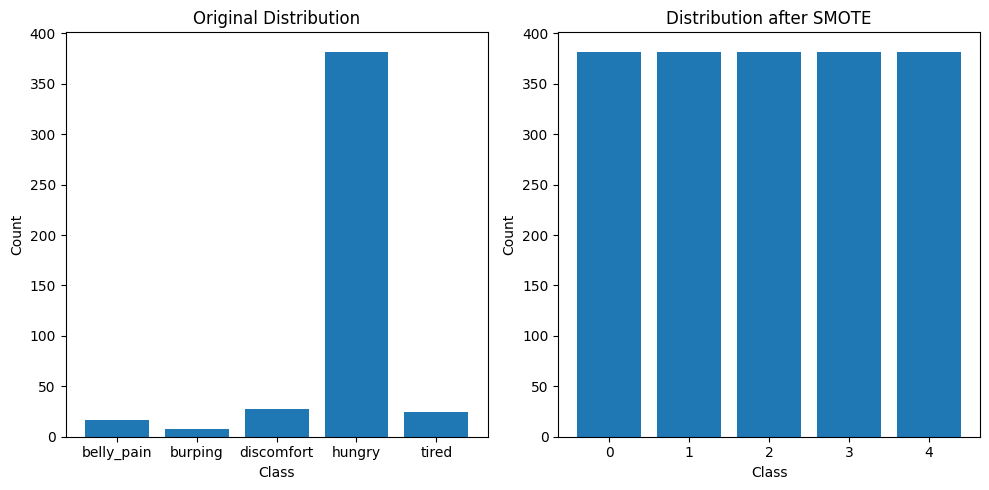

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Count occurrences of each class before and after SMOTE
unique_classes, counts_before = np.unique(y, return_counts=True)
unique_classes_resampled, counts_after = np.unique(np.argmax(y_resampled, axis=1), return_counts=True)

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(unique_classes, counts_before)
plt.title('Original Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(unique_classes)

plt.subplot(1, 2, 2)
plt.bar(unique_classes_resampled, counts_after)
plt.title('Distribution after SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(unique_classes_resampled)

plt.tight_layout()
plt.show()


In [82]:
### Train Set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=40)

In [83]:
X_train.shape

(342, 40)

## Model Creation

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [85]:
### Number of classes
num_labels = y_encoded.shape[1]
num_labels

5

In [86]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [87]:
model = Sequential()

### First Layer
model.add(Dense(100, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

### Second Layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

### Third Layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

### Final Layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/home/kotaro/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │           505 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 5)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,905 (175.41 KB)

 Trainable params: 44,905 (175.41 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

## Train the Model

In [90]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32
checkpointer = ModelCheckpoint(filepath='../saved_models/cry_classification.model.keras',verbose=1,save_best_only=True)

start = datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer])

duration = datetime.now() - start
print("Training Completed in Time: ", duration)

Epoch 1/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 6s 668ms/step - accuracy: 0.1875 - loss: 76.5353
Epoch 1: val_loss improved from inf to 26.44199, saving model to ../saved_models/cry_classification.model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3928 - loss: 52.5696 - val_accuracy: 0.8087 - val_loss: 26.4420
Epoch 2/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7188 - loss: 47.2618
Epoch 2: val_loss improved from 26.44199 to 16.06253, saving model to ../saved_models/cry_classification.model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7996 - loss: 29.0072 - val_accuracy: 0.8087 - val_loss: 16.0625
Epoch 3/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7188 - loss: 27.2957
Epoch 3: val_loss improved from 16.06253 to 6.71559, saving model to ../saved_models/cry_classification.model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7646 - loss: 20.0481 - val_accuracy: 0.8087 - val_loss: 6.7156
Epoch 4/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [91]:
test_accuracy = model.evaluate(X_test, y_test, verbose=0)
test_accuracy[1]

0.8086956739425659

In [95]:
filename = "../data/raw/tired/06c4cfa2-7fa6-4fda-91a1-ea186a4acc64-1430029237378-1.7-f-26-ti.wav"
audio, sample_rate = librosa.load(file_name)
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-2.3286275e+02  1.7170662e+02 -2.5333466e+01 -5.6219850e+00
 -5.8856044e+00 -4.3715584e+01 -1.4894572e+01 -1.2667830e+01
 -2.3865675e+01  2.1854393e-01 -9.1318226e+00 -2.0111504e+01
  1.9025140e+00 -3.4260948e+00 -1.1942624e+01  2.4870491e+00
  2.2343774e+00  4.9492946e+00  1.2955334e+01  6.6221023e-01
 -3.4681261e+00  8.5764700e-01 -6.0416484e+00 -2.8075111e+00
  1.4214835e+00 -6.7001152e+00 -5.1390967e+00 -2.0014246e+00
 -5.2920990e+00 -1.5537976e+00 -2.2622700e+00 -5.9107256e+00
  5.2037227e-01  1.8784090e+00 -7.4987841e-01  2.9216251e+00
  1.4514080e+00 -1.3240213e+00  6.5854108e-01 -1.2651192e+00]
[[-2.3286275e+02  1.7170662e+02 -2.5333466e+01 -5.6219850e+00
  -5.8856044e+00 -4.3715584e+01 -1.4894572e+01 -1.2667830e+01
  -2.3865675e+01  2.1854393e-01 -9.1318226e+00 -2.0111504e+01
   1.9025140e+00 -3.4260948e+00 -1.1942624e+01  2.4870491e+00
   2.2343774e+00  4.9492946e+00  1.2955334e+01  6.6221023e-01
  -3.4681261e+00  8.5764700e-01 -6.0416484e+00 -2.8075111e+00
   1.4214835e+00 

array(['hungry'], dtype='<U10')